In [1]:
from preprocessing.datamodel import SlideManager
from preprocessing.processing import split_negative_slide, split_positive_slide, create_tumor_mask, rgb2gray
from preprocessing.util import TileMap
from skimage.filters import threshold_otsu

In [2]:
CAM16_DIR = "/storage/"
# CAM17_DIR = CAM_BASE_DIR + "data/CAMELYON17"

GENERATED_DATA = "/storage/jitbitan/outputs/cam16_heatmaps/"
CHECKPOINT = "/storage/jitbitan/outputs/inception_resnetv2_cam16.tar"

In [3]:
sldmgr = SlideManager(cam16_dir=CAM16_DIR)

Failed: Normal_011.tif!
Failed: Normal_112.tif!
Failed: Normal_141.tif!
Failed: Normal_142.tif!
Failed: Tumor_043.tif!
Failed: Tumor_085.tif!


In [4]:
print(f"Training negative slides:  {len(sldmgr.negative_slides)}")
print(f"Training annotated slides: {len(sldmgr.annotated_slides)}")
print(f"Testing slides: {len(sldmgr.test_slides)}")

Training negative slides:  156
Training annotated slides: 108
Testing slides: 129


In [5]:
slide = sldmgr.get_slide('Normal_001')

In [6]:
import numpy as np

# load the slide into numpy array
arr = np.array(slide.get_full_slide(level=6))
print('array shape:', arr.shape)

# convert it to gray scale
arr_gray = rgb2gray(arr)
print('gray array shape:', arr_gray.shape)

# calculate otsu threshold
threshold = threshold_otsu(arr_gray)
print('otsu threshold:', threshold)


array shape: (3584, 1536, 4)
gray array shape: (3584, 1536)
otsu threshold: 12.366536458333329


In [7]:
tm = TileMap(slide)

In [8]:
slide.level_downsamples[3]

7.979166666666666

In [9]:
slide.level_downsamples

(1.0,
 1.9947916666666665,
 3.989583333333333,
 7.979166666666666,
 15.958333333333332,
 31.345238095238095,
 62.69047619047619,
 101.75,
 203.5,
 311.5)

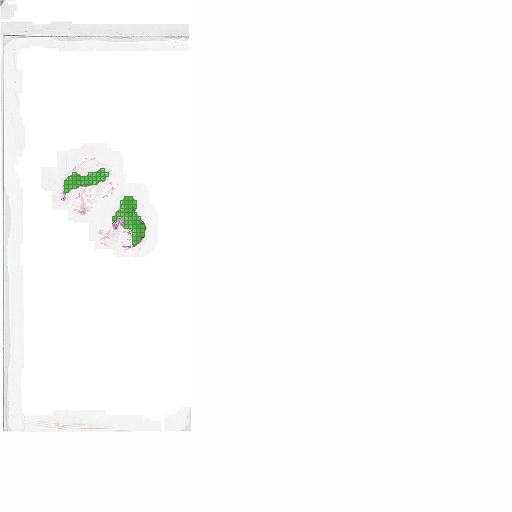

In [11]:
tile_iter = split_negative_slide(
    slide, level=3,
    otsu_threshold=threshold,
    tile_size=256,
    overlap=0,
    poi_threshold=0.9
)
tm = TileMap(slide)
for _, bounds in tile_iter:
    # add the boundaries of every tile to the map
    #print('next tile', datetime.datetime.now())
    # print(bounds)
    tm.add_tile(bounds)
tm.image

In [3]:
import numpy as np

a = np.empty((2, 3))
a[:] = np.nan

b = np.empty((2, 3))
b[:] = np.nan

print(a)
print(b)

[[nan nan nan]
 [nan nan nan]]
[[nan nan nan]
 [nan nan nan]]


In [4]:
a[:,1]=5
b[1,:]=6
print(a)
print(b)

[[nan  5. nan]
 [nan  5. nan]]
[[nan nan nan]
 [ 6.  6.  6.]]


In [5]:
(a+b)/2

array([[nan, nan, nan],
       [nan, 5.5, nan]])

In [6]:
x = np.stack((a,b))
x

array([[[nan,  5., nan],
        [nan,  5., nan]],

       [[nan, nan, nan],
        [ 6.,  6.,  6.]]])

In [11]:
y = np.nanmean(x, axis=0)
y

/tmp/ipykernel_51966/1266008160.py:1: RuntimeWarning: Mean of empty slice
  y = np.nanmean(x, axis=0)


array([[nan, 5. , nan],
       [6. , 5.5, 6. ]])